In [1]:
using Combinatorics
using Distributions
using StatsBase: countmap
using StatsPlots
default(fmt=:png)
using SymPy

In [2]:
n, k = 21, 10

(21, 10)

xs = xmin:xmax = 55:165


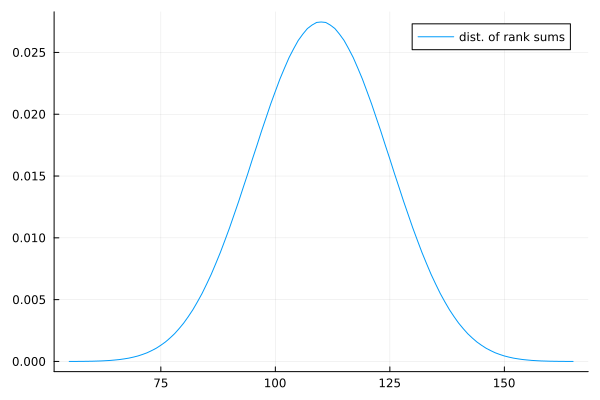

In [3]:
rank_sums = [sum(comb) for comb in combinations(1:n, k)]
c = countmap(rank_sums)
xmin, xmax = extrema(keys(c))
@show xs = xmin:xmax
ys = (k -> c[k]).(xs) / length(rank_sums)
plot(xs, ys; label="dist. of rank sums")

Xs = Xmin:Xmax = 55:165


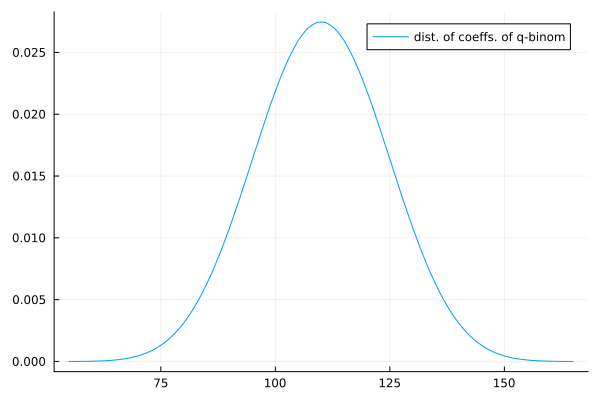

In [4]:
@vars q x
F = sympy.Poly(prod(1 + q^i*x for i in 1:n), x)
f = F.coeffs()
f_k = sympy.Poly(f[n+1 - k], q)
Ys = float(f_k.coeffs())
Ys ./= sum(Ys)
Xmax = f_k.degree()
Xmin = Xmax - length(Ys) + 1
@show Xs = Xmin:Xmax
plot(Xs, Ys; label="dist. of coeffs. of q-binom")

In [5]:
xs == Xs

true

In [6]:
ys == Ys

true

In [7]:
mu = mean(rank_sums)

110.0

In [8]:
k*(n-k)/2 + k*(k+1)/2 == mu

true

In [9]:
s2 = var(rank_sums; corrected=false)

201.66666666666666

In [10]:
k*(n-k)*(n+1)/12 == s2

true

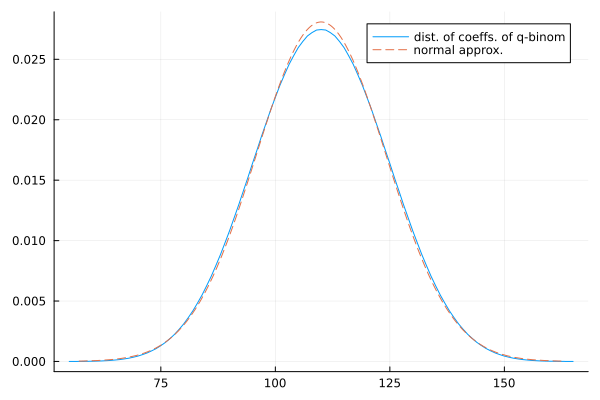

In [11]:
plot(Xs, Ys; label="dist. of coeffs. of q-binom")
plot!(Normal(mu, √s2); label="normal approx.", ls=:dash)

In [12]:
@show f_k;

f_k = Poly(q^165 + q^164 + 2*q^163 + 3*q^162 + 5*q^161 + 7*q^160 + 11*q^159 + 15*q^158 + 22*q^157 + 30*q^156 + 42*q^155 + 55*q^154 + 74*q^153 + 95*q^152 + 124*q^151 + 157*q^150 + 200*q^149 + 248*q^148 + 310*q^147 + 378*q^146 + 463*q^145 + 556*q^144 + 669*q^143 + 792*q^142 + 939*q^141 + 1097*q^140 + 1281*q^139 + 1478*q^138 + 1703*q^137 + 1940*q^136 + 2208*q^135 + 2486*q^134 + 2795*q^133 + 3113*q^132 + 3460*q^131 + 3812*q^130 + 4191*q^129 + 4569*q^128 + 4970*q^127 + 5364*q^126 + 5776*q^125 + 6172*q^124 + 6580*q^123 + 6964*q^122 + 7352*q^121 + 7708*q^120 + 8060*q^119 + 8371*q^118 + 8672*q^117 + 8924*q^116 + 9160*q^115 + 9340*q^114 + 9499*q^113 + 9598*q^112 + 9673*q^111 + 9686*q^110 + 9673*q^109 + 9598*q^108 + 9499*q^107 + 9340*q^106 + 9160*q^105 + 8924*q^104 + 8672*q^103 + 8371*q^102 + 8060*q^101 + 7708*q^100 + 7352*q^99 + 6964*q^98 + 6580*q^97 + 6172*q^96 + 5776*q^95 + 5364*q^94 + 4970*q^93 + 4569*q^92 + 4191*q^91 + 3812*q^90 + 3460*q^89 + 3113*q^88 + 2795*q^87 + 2486*q^86 + 2208*q^85 + 

In [13]:
# (x)_q = (1 - q^x)/(1 - q)
# (n)_q! = (1)_q (2)_q … (n)_q
# g_k = q^{k(k+1)/2} (n)_q!/((k)_q! (n-k)_q!), essentially a q-binomial coefficient
g_k = sympy.Poly(q^(k*(k+1)÷2) * prod((1 - q^(n-k+j))/(1 - q^j) for j in 1:k; init=Sym(1)).factor(), q)
@show g_k;

g_k = Poly(q^165 + q^164 + 2*q^163 + 3*q^162 + 5*q^161 + 7*q^160 + 11*q^159 + 15*q^158 + 22*q^157 + 30*q^156 + 42*q^155 + 55*q^154 + 74*q^153 + 95*q^152 + 124*q^151 + 157*q^150 + 200*q^149 + 248*q^148 + 310*q^147 + 378*q^146 + 463*q^145 + 556*q^144 + 669*q^143 + 792*q^142 + 939*q^141 + 1097*q^140 + 1281*q^139 + 1478*q^138 + 1703*q^137 + 1940*q^136 + 2208*q^135 + 2486*q^134 + 2795*q^133 + 3113*q^132 + 3460*q^131 + 3812*q^130 + 4191*q^129 + 4569*q^128 + 4970*q^127 + 5364*q^126 + 5776*q^125 + 6172*q^124 + 6580*q^123 + 6964*q^122 + 7352*q^121 + 7708*q^120 + 8060*q^119 + 8371*q^118 + 8672*q^117 + 8924*q^116 + 9160*q^115 + 9340*q^114 + 9499*q^113 + 9598*q^112 + 9673*q^111 + 9686*q^110 + 9673*q^109 + 9598*q^108 + 9499*q^107 + 9340*q^106 + 9160*q^105 + 8924*q^104 + 8672*q^103 + 8371*q^102 + 8060*q^101 + 7708*q^100 + 7352*q^99 + 6964*q^98 + 6580*q^97 + 6172*q^96 + 5776*q^95 + 5364*q^94 + 4970*q^93 + 4569*q^92 + 4191*q^91 + 3812*q^90 + 3460*q^89 + 3113*q^88 + 2795*q^87 + 2486*q^86 + 2208*q^85 + 

In [14]:
f_k == g_k

true

In [15]:
n, k = 31, 13

(31, 13)

xs = xmin:xmax = 91:325


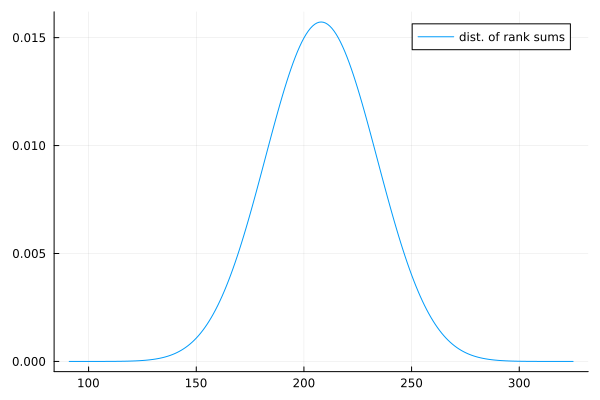

In [16]:
rank_sums = [sum(comb) for comb in combinations(1:n, k)]
c = countmap(rank_sums)
xmin, xmax = extrema(keys(c))
@show xs = xmin:xmax
ys = (k -> c[k]).(xs) / length(rank_sums)
plot(xs, ys; label="dist. of rank sums")

Xs = Xmin:Xmax = 91:325


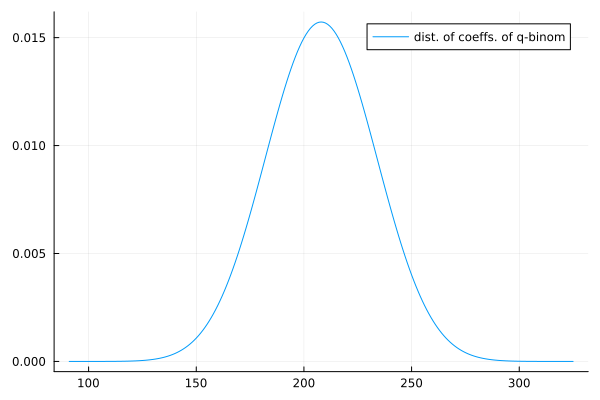

In [17]:
### @vars q x
F = sympy.Poly(prod(1 + q^i*x for i in 1:n), x)
f = F.coeffs()
f_k = sympy.Poly(f[n+1 - k], q)
Ys = float(f_k.coeffs())
Ys ./= sum(Ys)
Xmax = f_k.degree()
Xmin = Xmax - length(Ys) + 1
@show Xs = Xmin:Xmax
plot(Xs, Ys; label="dist. of coeffs. of q-binom")

In [18]:
xs == Xs

true

In [19]:
ys == Ys

true

In [20]:
mu = mean(rank_sums)

208.0

In [21]:
k*(n-k)/2 + k*(k+1)/2 == mu

true

In [22]:
s2 = var(rank_sums; corrected=false)

624.0

In [23]:
k*(n-k)*(n+1)/12 == s2

true

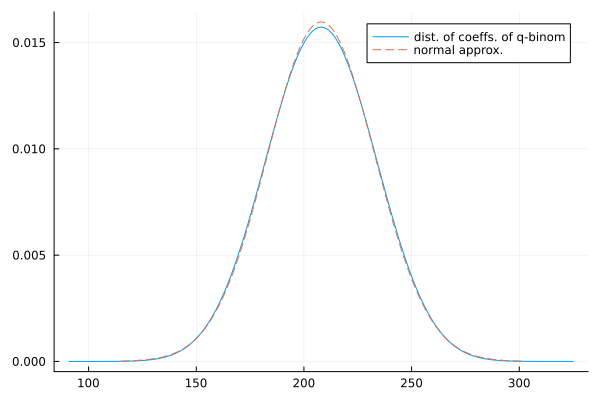

In [24]:
plot(Xs, Ys; label="dist. of coeffs. of q-binom")
plot!(Normal(mu, √s2); label="normal approx.", ls=:dash)

In [25]:
@show f_k;

f_k = Poly(q^325 + q^324 + 2*q^323 + 3*q^322 + 5*q^321 + 7*q^320 + 11*q^319 + 15*q^318 + 22*q^317 + 30*q^316 + 42*q^315 + 56*q^314 + 77*q^313 + 101*q^312 + 134*q^311 + 174*q^310 + 227*q^309 + 290*q^308 + 373*q^307 + 470*q^306 + 595*q^305 + 743*q^304 + 928*q^303 + 1146*q^302 + 1417*q^301 + 1733*q^300 + 2119*q^299 + 2570*q^298 + 3113*q^297 + 3743*q^296 + 4496*q^295 + 5363*q^294 + 6389*q^293 + 7568*q^292 + 8947*q^291 + 10523*q^290 + 12356*q^289 + 14436*q^288 + 16835*q^287 + 19549*q^286 + 22654*q^285 + 26147*q^284 + 30121*q^283 + 34566*q^282 + 39590*q^281 + 45188*q^280 + 51471*q^279 + 58437*q^278 + 66218*q^277 + 74798*q^276 + 84326*q^275 + 94791*q^274 + 106345*q^273 + 118975*q^272 + 132853*q^271 + 147949*q^270 + 164452*q^269 + 182331*q^268 + 201772*q^267 + 222739*q^266 + 245438*q^265 + 269803*q^264 + 296052*q^263 + 324115*q^262 + 354200*q^261 + 386222*q^260 + 420402*q^259 + 456616*q^258 + 495094*q^257 + 535695*q^256 + 578628*q^255 + 623731*q^254 + 671222*q^253 + 720884*q^252 + 772935*q^251

In [26]:
# (x)_q = (1 - q^x)/(1 - q)
# (n)_q! = (1)_q (2)_q … (n)_q
# g_k = q^{k(k+1)/2} (n)_q!/((k)_q! (n-k)_q!), essentially a q-binomial coefficient
g_k = sympy.Poly(q^(k*(k+1)÷2) * prod((1 - q^(n-k+j))/(1 - q^j) for j in 1:k; init=Sym(1)).factor(), q)
@show g_k;

g_k = Poly(q^325 + q^324 + 2*q^323 + 3*q^322 + 5*q^321 + 7*q^320 + 11*q^319 + 15*q^318 + 22*q^317 + 30*q^316 + 42*q^315 + 56*q^314 + 77*q^313 + 101*q^312 + 134*q^311 + 174*q^310 + 227*q^309 + 290*q^308 + 373*q^307 + 470*q^306 + 595*q^305 + 743*q^304 + 928*q^303 + 1146*q^302 + 1417*q^301 + 1733*q^300 + 2119*q^299 + 2570*q^298 + 3113*q^297 + 3743*q^296 + 4496*q^295 + 5363*q^294 + 6389*q^293 + 7568*q^292 + 8947*q^291 + 10523*q^290 + 12356*q^289 + 14436*q^288 + 16835*q^287 + 19549*q^286 + 22654*q^285 + 26147*q^284 + 30121*q^283 + 34566*q^282 + 39590*q^281 + 45188*q^280 + 51471*q^279 + 58437*q^278 + 66218*q^277 + 74798*q^276 + 84326*q^275 + 94791*q^274 + 106345*q^273 + 118975*q^272 + 132853*q^271 + 147949*q^270 + 164452*q^269 + 182331*q^268 + 201772*q^267 + 222739*q^266 + 245438*q^265 + 269803*q^264 + 296052*q^263 + 324115*q^262 + 354200*q^261 + 386222*q^260 + 420402*q^259 + 456616*q^258 + 495094*q^257 + 535695*q^256 + 578628*q^255 + 623731*q^254 + 671222*q^253 + 720884*q^252 + 772935*q^251

In [27]:
f_k == g_k

true